# Problem 1.11

***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 1**

***Problem 1.11***


**Estimate the maximum solar PV capacity that can be installed in a country based on land availability.Remove areas that are not suitable for solar PV because they are protected areas. Assume a capacity density for the remaining areas of 50 W/m$^2$.**

**This problem needs to be solved with software that can read and interpret maps with information on the land use in a country and different types of land use. See one option to approach this problem in
the online repository of this book.**

In this problem, we will calculate the maximum solar PV capacity that can be installed in a country based on the available land.

To that end, we will use the package [Atlite](https://github.com/PyPSA/atlite) (version>0.2.5)

This solution is based on the example [Landuse Availability]( https://atlite.readthedocs.io/en/latest/examples/landuse-availability.html)

We start by importing the packages that we will need and define the size of the figure. 

In [2]:
import atlite
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
from atlite.gis import shape_availability, ExclusionContainer

plt.rcParams['figure.figsize'] = [7, 7]

We will use the world map included in the package [geopandas](https://geopandas.org/en/stable/index.html). 
We select the country that we want to analyze and we plot it.
In this example, we select Spain.

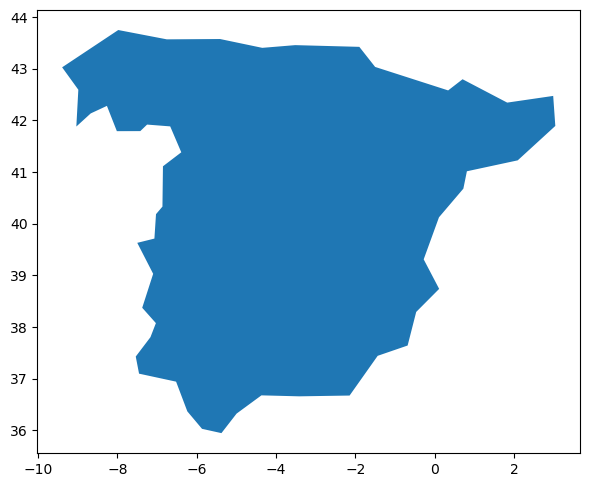

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries= ['Spain']

shapes = world[world.name.isin(countries)].set_index('name')

shapes.plot();

We want to include only the areas of the country that are suitable to install solar PV. 

To that end we use the [CORINE Land Cover (CLC)](https://land.copernicus.eu/pan-european/corine-land-cover) database. It provides a 100 m x 100 m raster which, for each raster cell, indicates the type of landuse (forest, urban, industrial). In total there are 44 classes.

The raster (.tif file) from the [download page](https://land.copernicus.eu/pan-european/corine-land-cover/clc2018?tab=download) needs to be stored as *data/corine.tif*

In [4]:
CORINE = 'data/corine.tif'

We consider the following codes to be suitable for solar PV:
- artificial surfaces (1-11)
- agriculture land except for those areas already occupied by agriculture with significant natural vegetation and agro-forestry areas (12-20)
- natural grasslands (26)
- bare rocks (31)
- sparsely vegetated areas (32)

We define an ExclusionContainer that includes all the raster cell that we want to exclude, apply the exclusion and calculate the eligible area, and the percentage of total area that it represents. 

In [5]:
excluder = ExclusionContainer()

excluder.add_raster(CORINE, codes=(21, 22, 23, 24, 25, 27, 28, 29, 30, 33,
                                   34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44))

country = shapes.geometry.to_crs(excluder.crs)

masked, transform = shape_availability(country, excluder)
eligible_area = masked.sum() * excluder.res**2
eligible_share = masked.sum() * excluder.res**2 / country.geometry.item().area

C:\Users\34620\.conda\envs\env_pv_textbook\lib\site-packages\atlite\gis.py:470: UserWarning: Output dtype of shape_availability changed from float to boolean.
  "Output dtype of shape_availability changed from float to boolean.", UserWarning
C:\Users\34620\.conda\envs\env_pv_textbook\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in long_scalars
  if __name__ == "__main__":
C:\Users\34620\.conda\envs\env_pv_textbook\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


We plot the map of the country and the eligible area in orange.

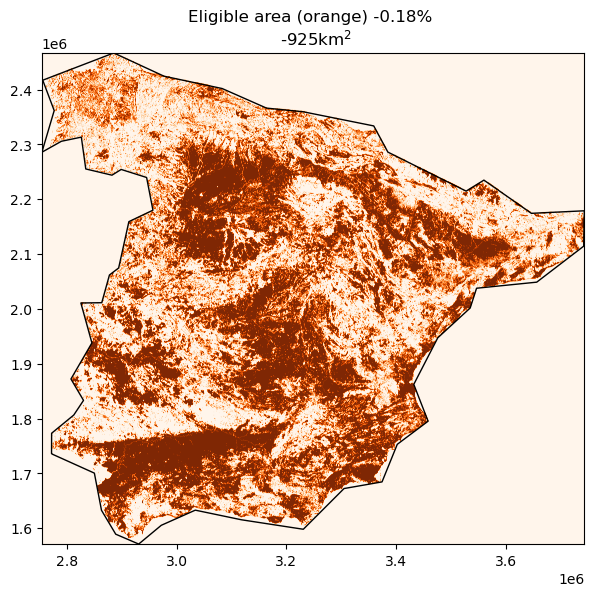

In [6]:
fig, ax = plt.subplots()
ax = show(masked, transform=transform, cmap='Oranges', ax=ax)
country.plot(ax=ax, edgecolor='k', color='None')
ax.set_title(f'Eligible area (orange) {eligible_share * 100:2.2f}% \n {eligible_area * 0.000001:2.0f}km$^2$' );


We assume a capacity density for solar PV installations of 50 W/m2, and calculate the total potential by multiplying the capacity density times the available land.

In [7]:
PV_potential = eligible_area*50*0.000000001 #W ->GW
print(f'PV potential {PV_potential:2.1f} GW')

PV potential 1.0 GW


C:\Users\34620\.conda\envs\env_pv_textbook\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.
